## Model setup XBeach 1D

Setup a 1D XBeach model with the Python toolbox.

In [1]:
# import default modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sys
import os

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(os.path.abspath(os.path.join('..', '..', 'xbeach-toolbox')))

**no xbTools installation found in environment, adding parent path of notebook to see if it works


Import the toolbox.

In [2]:
## import xbeach tools
#sys.path.append(os.path.abspath(os.path.join('..' )))

from xbTools.grid.creation import xgrid, ygrid
from xbTools.grid.extension import seaward_extend
from xbTools.xbeachtools import XBeachModelSetup
from xbTools.general.wave_functions import offshore_depth

### Data
Load and plot the bathymetry data

Text(0.5, 1.0, 'bathy')

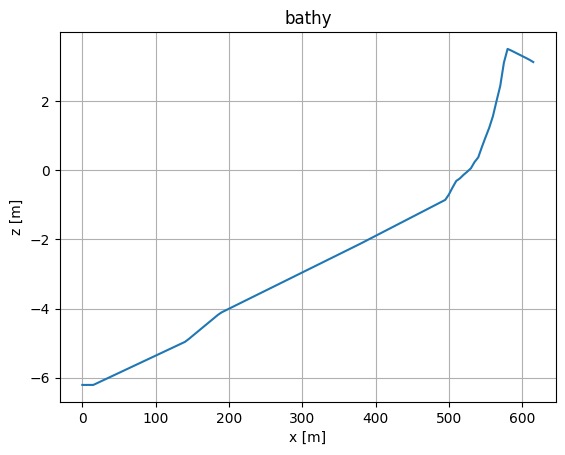

In [3]:
## load data
bathy = np.loadtxt('..//examples//data//input//bathy.dep')
bathy = bathy[0,:]

## set bathy grid
nx = 124
ny = 72
dx = 5
dy = 20

x = np.linspace(0,(nx-1)*dx,nx)

## plot
plt.figure()
plt.plot(x,bathy)
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.grid('on')
plt.title('bathy')

### Create x-grid
Create spatially varying x-grid resolution. In this example a minimum grid resolution of 2 m is applied.

Note that the following settings can be specified:

`xgrid(x,z,
          ppwl=20,
          dxmin=5,
          dxmax=np.inf,
          vardx=1,
          wl = 0,
          eps = 0.01,
          Tm = 8,
          xdry=None,
          zdry=None,
          dxdry = None,
          depthfac = 2,
          maxfac = 1.15,
          nonh = False)`

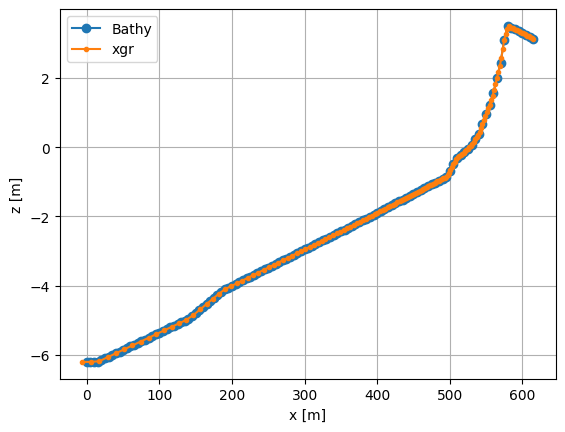

In [4]:
xgr,zgr = xgrid(x, bathy,dxmin=2)


plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.legend(['Bathy','xgr'])
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.grid('on')

### Interpolate
Interpolate data to xb grid.

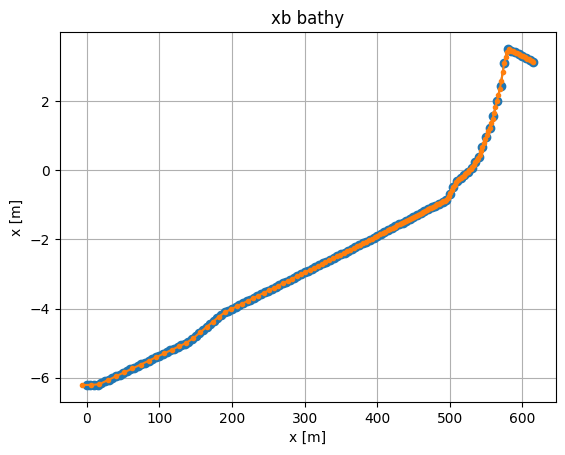

In [5]:
zgr = np.interp(xgr, x, bathy)

plt.figure()
plt.plot(x,bathy,'-o')
plt.plot(xgr,zgr,'.-')
plt.xlabel('x [m]')
plt.ylabel('x [m]')
plt.title('xb bathy')
plt.grid('on')


### Seaward extend
Extend the grid to the required offshore depth. In this case 20 m with a artifial slope of 1/20.

If desired the function `offshore_depth` can also be used to determine the required offshore water depth.

In [6]:
#d_start, slope, Hm0_shoal = offshore_depth(Hm0=9, Tp=15, depth_offshore_profile=15, depth_boundary_conditions=20)

xgr, ygr, zgr = seaward_extend(xgr,[0],zgr,slope=1/20,depth=-20)



plt.figure()
plt.plot(xgr.T,zgr[:,:].T)
plt.xlabel('x [m]')
plt.ylabel('z [m]')


ValueError: could not broadcast input array from shape (24,) into shape (23,)

### Create model setup
Create the model setup class

In [ ]:
xb_setup = XBeachModelSetup('Test som 2')

print(xb_setup)

Add the grid, wave boundary conditions and parameter to the model.

Note that the following grid settings can be specified:

`set_grid(self,xgr,ygr,zgr, posdwn=1, xori=0, yori=0,alfa=0, thetamin=-90, thetamax = 90, dtheta=10, dtheta_s=10)`

Two different boundary conditions can be specified: `jonstable` or `parametric`.


In [ ]:
xb_setup.set_grid(xgr,None,zgr,posdwn=-1)

xb_setup.set_waves('parametric',{'Hm0':2, 'Tp':5, 'mainang':270, 'gammajsp':3.3, 's' : 10000, 'fnyq':1})
#xb_setup.set_waves('jonstable',{'Hm0':[1.5, 2, 1.5],'Tp':[4, 5, 4],'gammajsp':[3.3, 3.3, 3.3], 's' : [20,20,20], 'mainang':[270,280, 290],'duration':[3600, 3600, 3600],'dtbc':[1,1,1]})

xb_setup.set_params({'wavemodel':'surfbeat',
                     'morphology':0,
                     'befriccoef':0.01,
                     'tstop':3600,
                     'zs0':0,
                     'nglobalvar':['zb','zs','H'],
                     'npointvar':['zs','zb'],
                     'nmeanvar':['zb'],
                     'npoints':['1 0', '6 0', '10 0', '12 0']})

Write the model setup

In [ ]:
sim_path = os.path.join('xb-1D')
if not os.path.exists(sim_path):
    os.mkdir(sim_path)
xb_setup.write_model(sim_path)